# Validation results for TinyCam

In [4]:
from utils import deserialize
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [25]:
mask_path = "/home/data/tinycam/val/salient_masks"

### Annotated Ground Truths

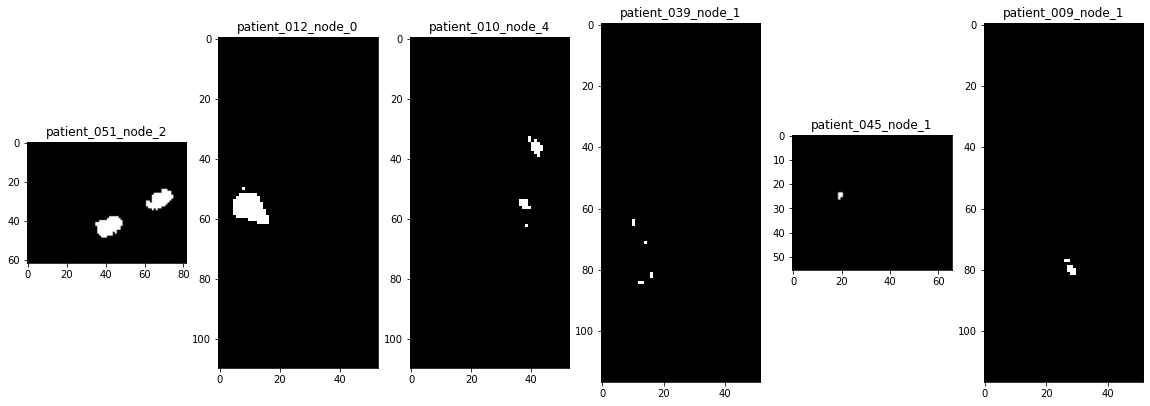

In [14]:
fig, axs = plt.subplots(1, 6, sharex=False, sharey=False, figsize=(20, 8))
files_to_ref = []
for i,filename in enumerate(os.listdir(mask_path)):
    files_to_ref.append(filename)
    mask = np.load(mask_path + "/" + filename)
    # same as transpose...
    mask = np.rot90(mask, k=3, axes=(0, 1))
    mask = np.fliplr(mask)
    
    axs[i].imshow(mask, cmap="gray")
    axs[i].set_title(filename.split("_MASK")[0])

plt.show()

In [15]:
files_to_ref

['patient_051_node_2_MASK.npy',
 'patient_012_node_0_MASK.npy',
 'patient_010_node_4_MASK.npy',
 'patient_039_node_1_MASK.npy',
 'patient_045_node_1_MASK.npy',
 'patient_009_node_1_MASK.npy']

In [16]:
reference = [f.split("_MASK")[0] for f in files_to_ref]
reference

['patient_051_node_2',
 'patient_012_node_0',
 'patient_010_node_4',
 'patient_039_node_1',
 'patient_045_node_1',
 'patient_009_node_1']

In [17]:
position_dict = {}
for i, mask in enumerate(reference):
    position_dict[mask] = i

print(position_dict)

{'patient_051_node_2': 0, 'patient_012_node_0': 1, 'patient_010_node_4': 2, 'patient_039_node_1': 3, 'patient_045_node_1': 4, 'patient_009_node_1': 5}


### Outputs: PPMs, PCMs, SSMs, SCAMs

In [26]:
vgg19_ppm_dict = "/home/codex_analysis/codex-analysis/code/outputs/VGG19_bn-hdf5_random_loading-224-label_inherit-bce_loss-on_cam-cam16-filtration_background_epoch9_PPM.obj"
vgg19_pcm_dict = "/home/codex_analysis/codex-analysis/code/outputs/VGG19_bn-hdf5_random_loading-224-label_inherit-bce_loss-on_cam-cam16-filtration_background_epoch9_PPMprobs.obj"
vgg19_ssm_dict = "/home/codex_analysis/codex-analysis/code/outputs/VGG19_bn-hdf5_random_loading-224-label_inherit-bce_loss-on_cam-cam16-filtration_background_epoch9_saliency_dict.obj"
vgg19_sgm_dict = "/home/codex_analysis/codex-analysis/code/outputs/VGG19_bn-hdf5_random_loading-224-label_inherit-bce_loss-on_cam-cam16-filtration_background_epoch9_gradcam_dict.obj"

bSGN_vgg19_ppm_dict = "/home/codex_analysis/codex-analysis/code/outputs/gamify-uncertainty-backpropblindfolded-max_pooling-VGG19_bn-hdf5_random_loading-224-label_inherit-bce_loss-on_cam-cam16-filtration_background_EMBEDDER_epoch9_PPM.obj"
bSGN_vgg19_pcm_dict = "/home/codex_analysis/codex-analysis/code/outputs/gamify-uncertainty-backpropblindfolded-max_pooling-VGG19_bn-hdf5_random_loading-224-label_inherit-bce_loss-on_cam-cam16-filtration_background_EMBEDDER_epoch9_PPMprobs.obj"
bSGN_vgg19_ssm_dict = "/home/codex_analysis/codex-analysis/code/outputs/gamify-uncertainty-backpropblindfolded-max_pooling-VGG19_bn-hdf5_random_loading-224-label_inherit-bce_loss-on_cam-cam16-filtration_background_EMBEDDER_epoch9_saliency_dict.obj"
bSGN_vgg19_sgm_dict = "/home/codex_analysis/codex-analysis/code/outputs/gamify-uncertainty-backpropblindfolded-max_pooling-VGG19_bn-hdf5_random_loading-224-label_inherit-bce_loss-on_cam-cam16-filtration_background_EMBEDDER_epoch9_gradcam_dict.obj"

In [31]:
vgg19_ppms = deserialize(vgg19_ppm_dict)
bsgn_ppms = deserialize(bSGN_vgg19_ppm_dict)

vgg19_pcms = deserialize(vgg19_pcm_dict)
bsgn_pcms = deserialize(bSGN_vgg19_pcm_dict)

vgg19_ssms = deserialize(vgg19_ssm_dict)
bsgn_ssms = deserialize(bSGN_vgg19_ssm_dict)

vgg19_sgms = deserialize(vgg19_sgm_dict)
bsgn_sgms = deserialize(bSGN_vgg19_sgm_dict)

In [61]:
def plot_maps(map_dict, position_dict, reference, cmap="gray"):
    fig, axs = plt.subplots(1, 6, sharex=False, sharey=False, figsize=(20, 8))
    for key in map_dict.keys():
        if key in reference:
            stitch_map = map_dict[key]
            i = position_dict[key]
            if cmap == "jet":
                im = axs[i].imshow(stitch_map, cmap=cmap, vmin=-1,vmax=1)
            else:
                im = axs[i].imshow(stitch_map, cmap=cmap)
            axs[i].set_title(key)
            if cmap != "gray":
                if i == 5:
                    plt.colorbar(im, ax=axs[i])
    
    plt.show()


Patch Prediction Maps (PPMs)

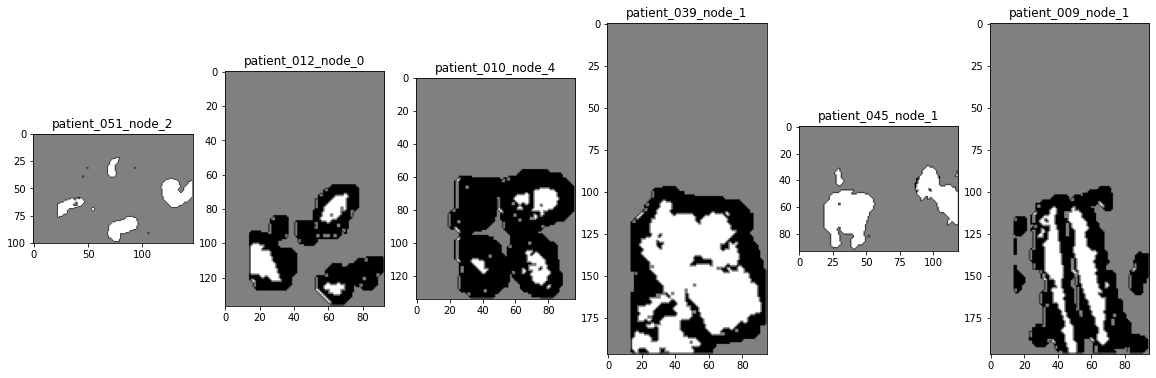

In [62]:
plot_maps(vgg19_ppms, position_dict, reference, cmap="gray")

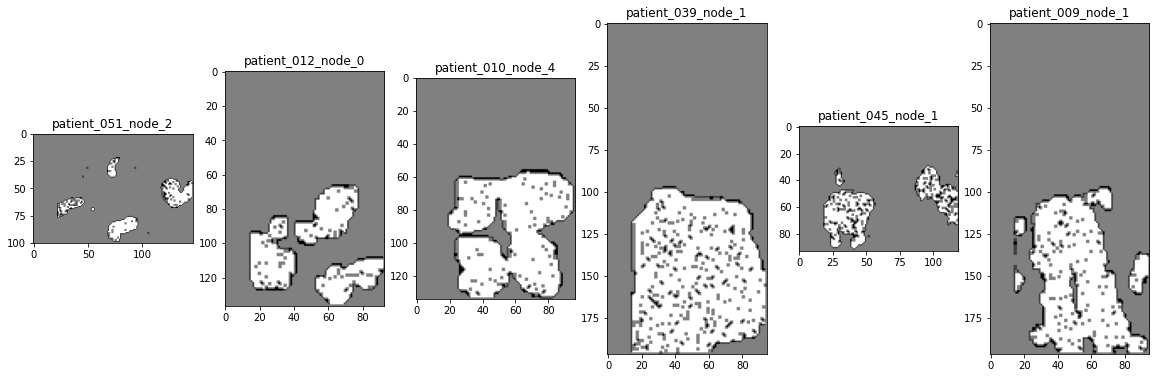

In [63]:
plot_maps(bsgn_ppms, position_dict, reference, cmap="gray")

Patch Confidence Maps (PCMs)

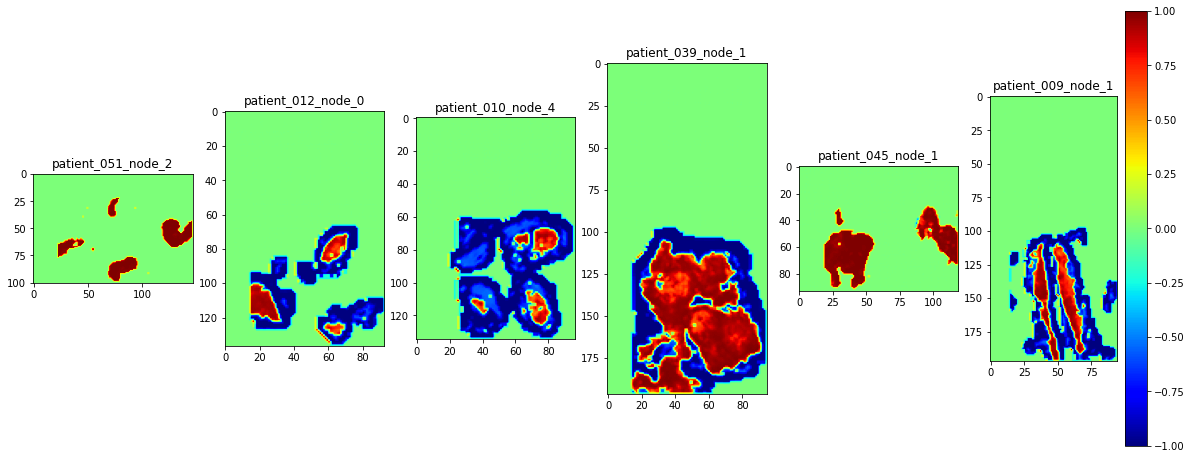

In [64]:
plot_maps(vgg19_pcms, position_dict, reference, cmap="jet")

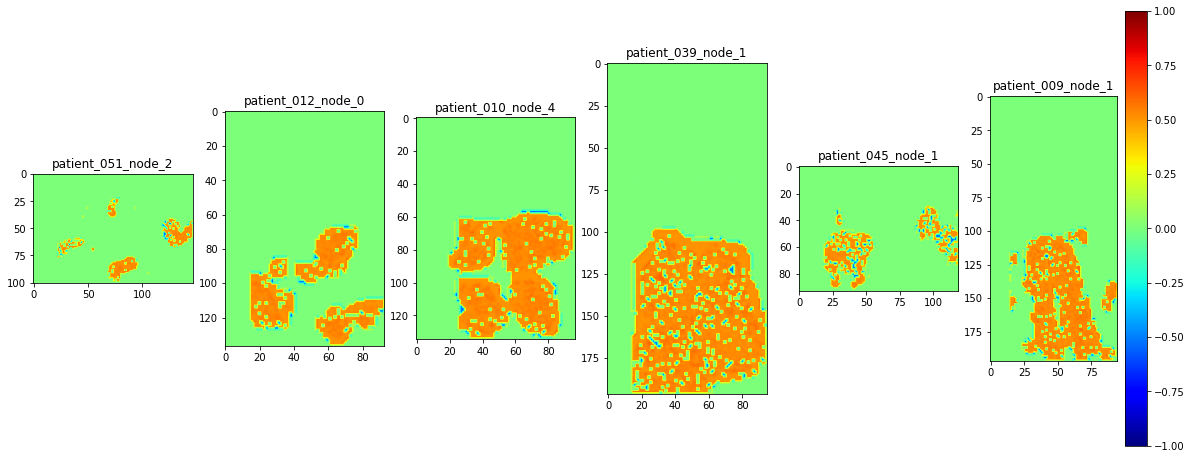

In [65]:
plot_maps(bsgn_pcms, position_dict, reference, cmap="jet")

Stitched Saliency Maps (SSMs)

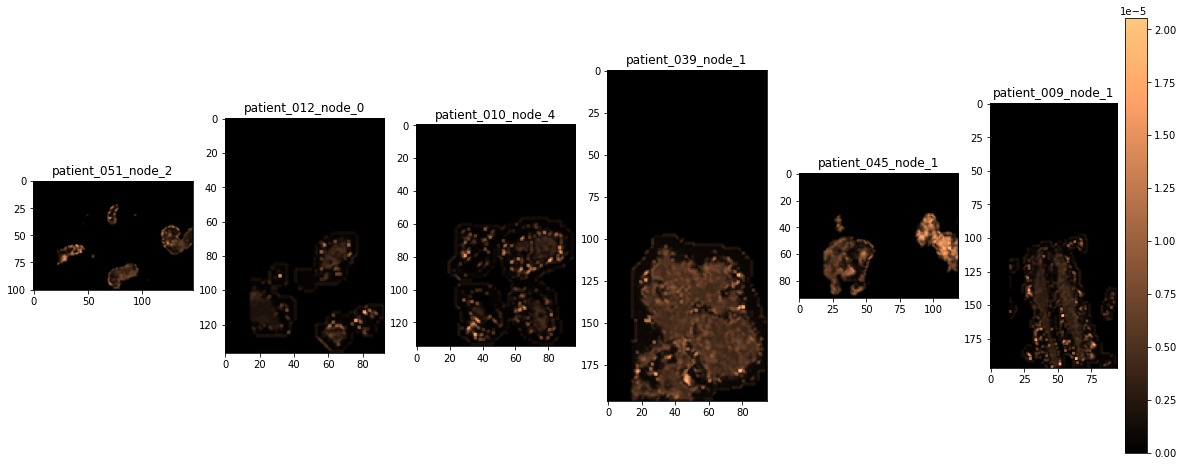

In [66]:
plot_maps(vgg19_ssms, position_dict, reference, cmap="copper")

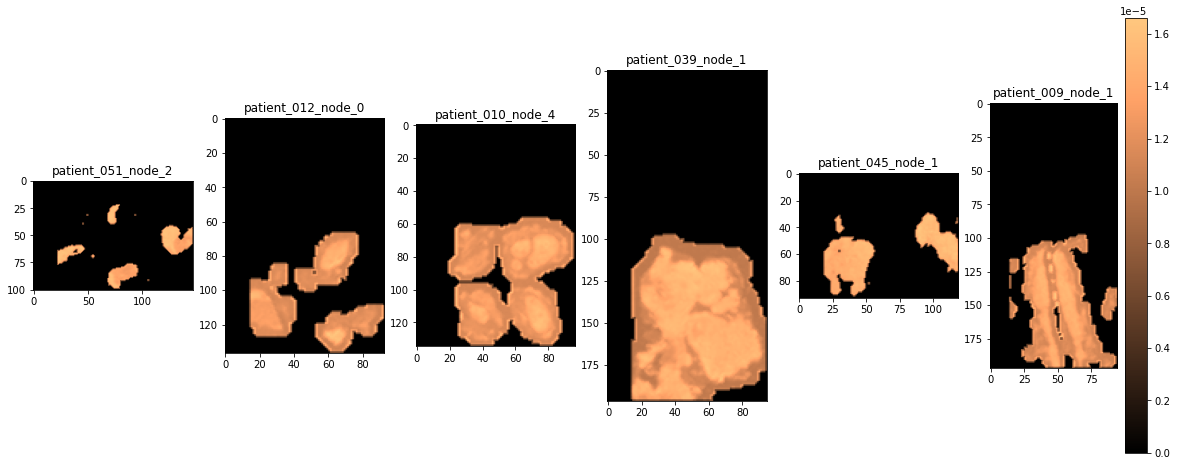

In [67]:
plot_maps(bsgn_ssms, position_dict, reference, cmap="copper")

Stitched Grad-CAMs (SCAMs)

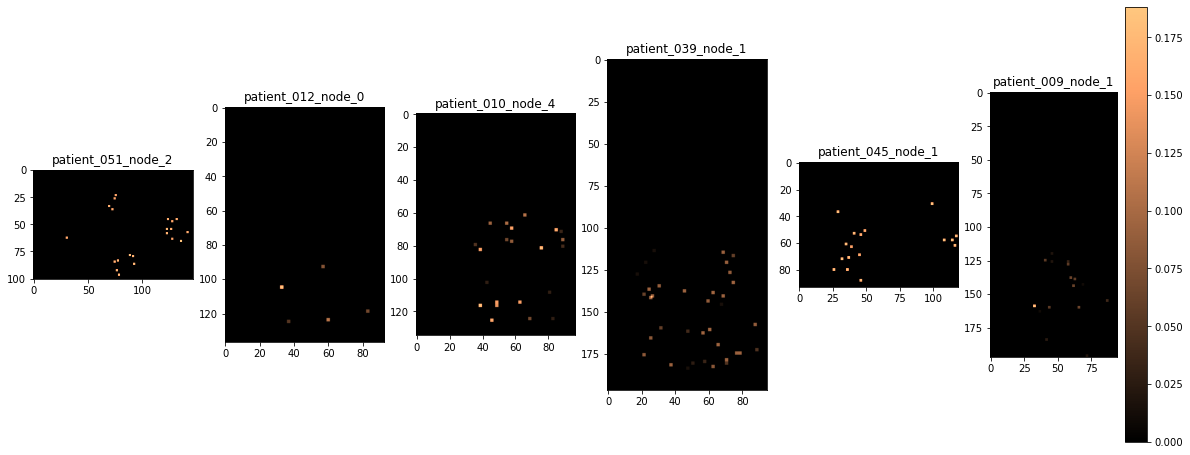

In [68]:
plot_maps(vgg19_sgms, position_dict, reference, cmap="copper")

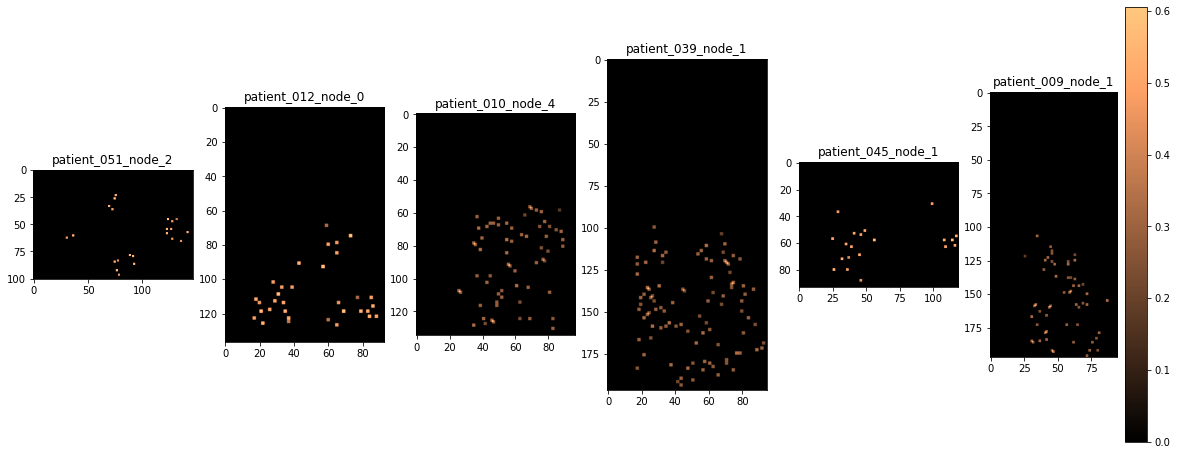

In [69]:
plot_maps(bsgn_sgms, position_dict, reference, cmap="copper")

### Source Images: raw & down-sampled

In [22]:
validation_path = "/home/data/tinycam/val/val.hdf5"
import h5py
hf = h5py.File(validation_path, 'r')
files = list(hf.keys())

plotting: patient_045_node_1.npy
plotting: patient_009_node_1.npy
plotting: patient_012_node_0.npy
plotting: patient_010_node_4.npy
plotting: patient_039_node_1.npy
plotting: patient_051_node_2.npy


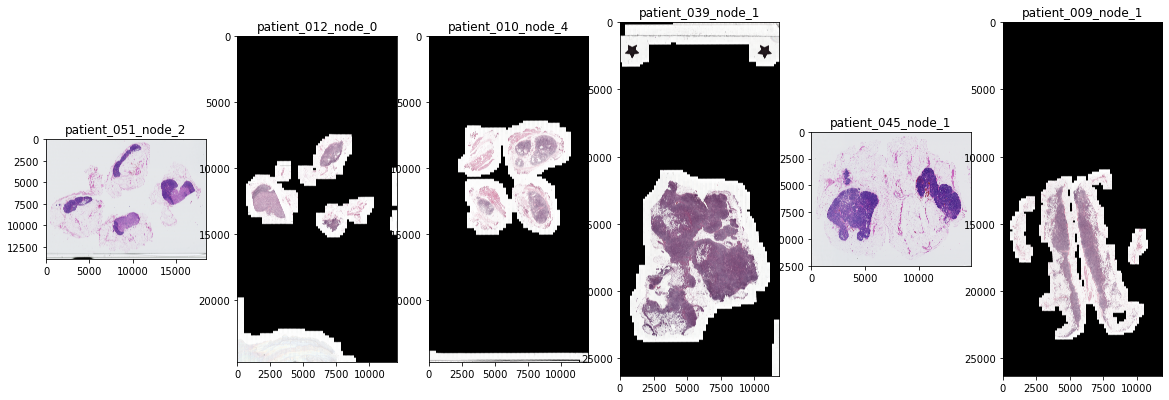

In [23]:
extract_path = "/home/data/tinycam/val/extract/val_extract"

fig, axs = plt.subplots(1, 6, sharex=False, sharey=False, figsize=(20, 8))
for npfile in os.listdir(extract_path):
    print("plotting:", npfile)
    im = np.load(extract_path + "/" + npfile)
    im_id = npfile.split(".")[0]
    i = position_dict[im_id]
    axs[i].imshow(im)
    axs[i].set_title(im_id)

plt.show()


plotting: patient_045_node_1.npy
plotting: patient_009_node_1.npy
plotting: patient_012_node_0.npy
plotting: patient_010_node_4.npy
plotting: patient_039_node_1.npy
plotting: patient_051_node_2.npy


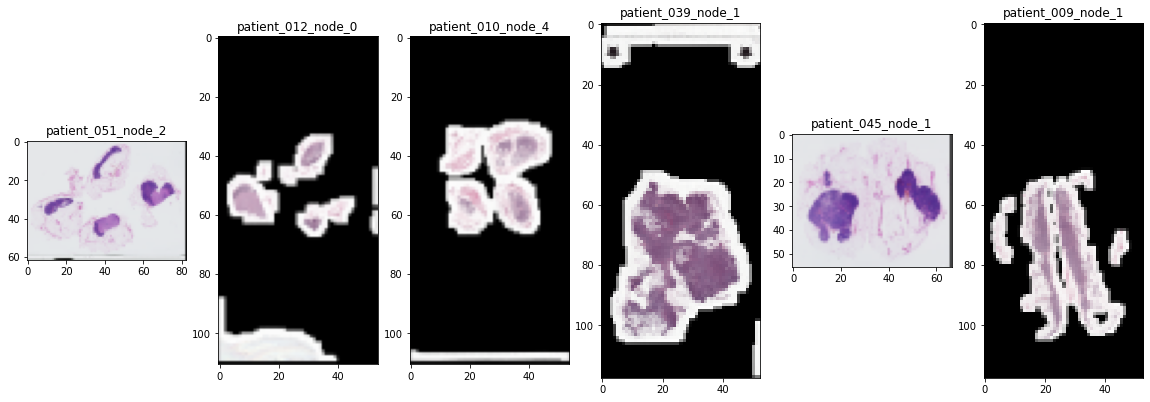

In [24]:
import skimage
from skimage import measure
extract_path = "/home/data/tinycam/val/extract/val_extract"

fig, axs = plt.subplots(1, 6, sharex=False, sharey=False, figsize=(20, 8))

for npfile in os.listdir(extract_path):
    print("plotting:", npfile)
    im = np.load(extract_path + "/" + npfile)
    im_id = npfile.split(".")[0]
    i = position_dict[im_id]

    patch_size = 224
    patch_array_dim = [im.shape[0] // patch_size, im.shape[1] // patch_size]
    new_im = np.zeros(patch_array_dim)
    # print(new_im.shape)
    new_im = skimage.measure.block_reduce(im, block_size=(patch_size, patch_size, 1), func=np.mean).astype(np.uint8)
    # print(new_im.shape)
    # print(new_im)
    axs[i].imshow(new_im)
    axs[i].set_title(im_id)

plt.show()


### View embeddings

In [1]:
bsgn_embeds = "/home/cache/cam/gamify-uncertainty-backpropblindfolded-max_pooling-VGG19_bn-hdf5_random_loading-224-label_inherit-bce_loss-on_cam-cam16-filtration_background-curr_embeddings_train.obj"
vgg19_embeds = "/home/cache/cam/VGG19_bn-hdf5_random_loading-224-label_inherit-bce_loss-on_cam-cam16-filtration_background-curr_embeddings_train.obj"

In [2]:
from utils import deserialize
import torch

# e_vgg = torch.load(vgg19_embeds, map_location=torch.device('cuda'))
e_bsgn = torch.load(bsgn_embeds, map_location=torch.device('cpu'))

/home/codex_analysis/codex-analysis/envs/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
el_list = list(e_bsgn["tumor_017"][0].numpy())
clipped_els = []
for el in el_list:
    if el > 0:
        clipped_els.append(el)

print(len(clipped_els))

2740


In [4]:
import numpy as np

In [5]:
t1=e_bsgn["tumor_017"][0].numpy()
t2=e_bsgn["tumor_032"][0].numpy()
t3=e_bsgn["tumor_019"][0].numpy()
n1=e_bsgn['normal_003'][0].numpy()
n2=e_bsgn['normal_083'][0].numpy()
n3=e_bsgn['normal_096'][0].numpy()

t_concat = np.stack((t1,t2,t3,n1,n2,n3), axis=1)
t_concat.shape

(4096, 6)

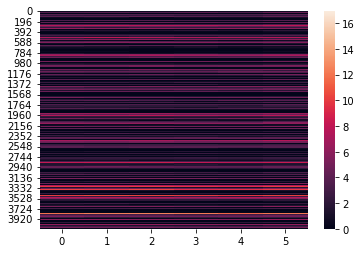

In [6]:
import seaborn as sns
ax = sns.heatmap(t_concat)

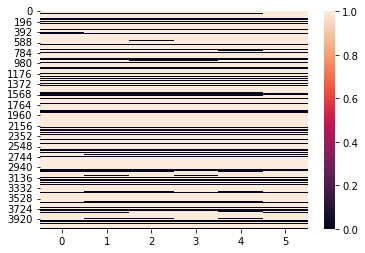

In [7]:
t1=e_bsgn["tumor_017"][0].numpy() > 0
t2=e_bsgn["tumor_032"][0].numpy() > 0 
t3=e_bsgn["tumor_019"][0].numpy() > 0
n1=e_bsgn['normal_003'][0].numpy() > 0
n2=e_bsgn['normal_083'][0].numpy() > 0 
n3=e_bsgn['normal_096'][0].numpy() > 0

t_concat = np.stack((t1,t2,t3,n1,n2,n3), axis=1)

ax = sns.heatmap(t_concat)

In [8]:
t1=t1[t1 > 0.0]
t2=t2[t2 > 0.0]
t3=t3[t3 > 0.0]
print(t1.shape, t2.shape, t3.shape)

(2740,) (2734,) (2646,)


In [9]:
import matplotlib.pyplot as plt

Take a look at all embeddings as a heatmap

In [10]:
def plot_heatmap_embeds(embeds_dict, thresh_flag=False):
    n = len(embeds_dict.keys())
    p = embeds_dict[list(embeds_dict.keys())[0]][0].numpy().size
    
    labs = []
    array_0, array_1 = [], []
    for i, key in enumerate(embeds_dict.keys()):
        try:
            e = embeds_dict[key][0].numpy()
        except IndexError:
            print(i, key, "has missing embedding")
            pass
        if type(key) == str and "tumor" in key:
            array_1.append(e)
        else:
            array_0.append(e) 

    # fig, axs = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(20, 8))
    plt.figure(figsize=(20, 8))
    array_0 = np.vstack(array_0)
    array_1 = np.vstack(array_1)
    array = np.vstack((array_0, array_1))
    sns.heatmap(array)
    # axs[0] = sns.heatmap(array_0)
    # axs[1] = sns.heatmap(array_1)
    plt.show()

    

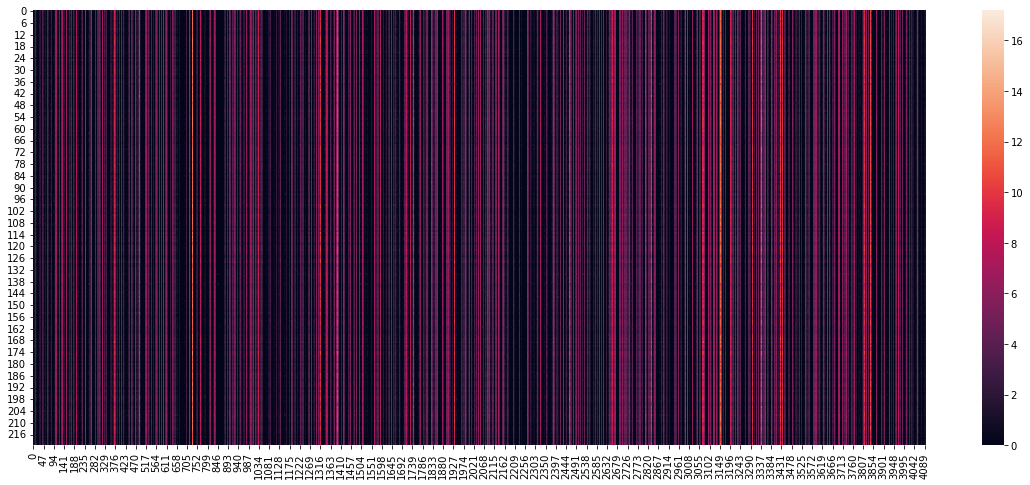

In [11]:
plot_heatmap_embeds(e_bsgn)

In [12]:
from sklearn.manifold import TSNE
from tkinter.ttk import LabeledScale

def plot_tsne_embeds(embeds_dict):
    n = len(embeds_dict.keys())
    p = embeds_dict[list(embeds_dict.keys())[0]][0].numpy().size
    array = np.zeros((n,p))
    print(array.shape)
    
    labs = []
    for i, key in enumerate(embeds_dict.keys()):
        try:
            e = embeds_dict[key][0].numpy()
        except IndexError:
            print(i, key, "has missing embedding")
            pass
        if type(key) == str and "tumor" in key:
            labs.append(1)
        else:
            labs.append(0)
        array[i,:] = e
    
    # get centroids
    n_1 = np.sum(labs)
    masked_array_1 = array.T * np.array(labs)
    centroid_1 = np.sum(masked_array_1, axis=1) / n_1

    n_0 = n - n_1
    labs_rev = 1 - np.array(labs)
    masked_array_0 = array.T * labs_rev
    centroid_0 = np.sum(masked_array_0, axis=1) / n_0

    array = np.vstack((array, centroid_1, centroid_0))
    labs.extend([1,0])
    [100, 100]

    # tsne
    X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30).fit_transform(array)
    print(X_embedded.shape)
    plt.figure()
    plt.xlabel("tSNE-0")
    plt.ylabel("tSNE-1")
    plt.scatter(X_embedded[-2:,0], X_embedded[-2:,1], c=labs[-2:], s=[200,200], cmap="Dark2", marker="x")
    plt.scatter(X_embedded[:-2,0], X_embedded[:-2,1], c=labs[:-2], alpha=0.5, cmap="Dark2")



(222, 4096)
(224, 2)


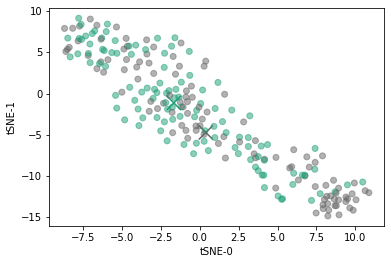

In [13]:
plot_tsne_embeds(e_bsgn)

In [44]:
from scipy.spatial import distance
sample_size = 500 

def cosine_sampler(array_0):
    dist_0 = []
    while len(dist_0) < sample_size:
        for i,vec1 in enumerate(array_0):
            if i < len(array_0) - 1:
                for j,vec2 in enumerate(array_0[i+1:]):
                    # print(vec1, vec2)
                    try:
                        d = distance.cosine(vec1, vec2)
                        dist_0.append(d)
                    except ValueError:
                        pass
    return dist_0

In [45]:
import random

def plot_distrib_embeds(embeds_dict):
    n = len(embeds_dict.keys())
    p = embeds_dict[list(embeds_dict.keys())[0]][0].numpy().size
    
    labs = []
    array_0, array_1 = [], []
    for i, key in enumerate(embeds_dict.keys()):
        try:
            e = embeds_dict[key][0].numpy()
        except IndexError:
            print(i, key, "has missing embedding")
            pass
        if type(key) == str and "tumor" in key:
            array_1.append(e)
        else:
            array_0.append(e) 

    # fig, axs = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(20, 8))
    
    plt.figure()
    dist_0 = cosine_sampler(array_0)
    plt.hist(dist_0, bins=20)
    plt.title("Class-0 image-pooled cosine distances")
    plt.show()

    plt.figure()
    dist_1 = cosine_sampler(array_1)
    plt.hist(dist_1, bins=20)
    plt.title("Class-1 image-pooled cosine distances")
    plt.show()

    array = array_0 + array_1
    print(array)
    array = random.shuffle(array)
    cosine_sampler(array)
    
    



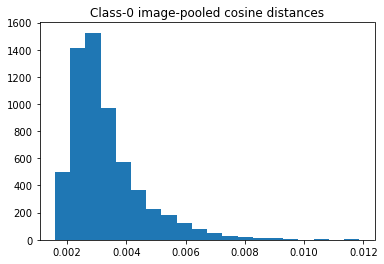

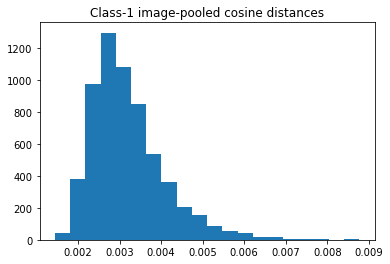

[array([0.       , 0.       , 0.8444958, ..., 1.294756 , 3.2823408,
       0.       ], dtype=float32), array([0.       , 0.       , 0.784387 , ..., 1.1671453, 2.9243069,
       0.       ], dtype=float32), array([0.        , 0.        , 0.62122864, ..., 0.9710542 , 3.019335  ,
       0.        ], dtype=float32), array([0.       , 0.       , 0.6504746, ..., 1.1711749, 2.903767 ,
       0.       ], dtype=float32), array([0.       , 0.       , 0.7203398, ..., 1.1799809, 2.7698474,
       0.       ], dtype=float32), array([0.       , 0.       , 0.5494428, ..., 1.0373206, 2.4912243,
       0.       ], dtype=float32), array([0.        , 0.        , 0.63398135, ..., 1.3817331 , 2.9218826 ,
       0.        ], dtype=float32), array([0.       , 0.       , 0.7637453, ..., 1.1897972, 3.8051744,
       0.       ], dtype=float32), array([0.        , 0.        , 0.63610214, ..., 1.0468135 , 2.431602  ,
       0.        ], dtype=float32), array([0.       , 0.       , 0.6535652, ..., 1.7525373, 2.69570

TypeError: 'NoneType' object is not iterable

In [46]:
plot_distrib_embeds(e_bsgn)